## Examples from the book "Principles of Data Science"
highly recommend this book for beginners in data science.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url)
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [26]:
bikes[['count', 'temp']].corr()

,count,temp
count,1.000000,0.394454
temp,0.394454,1.000000


In [14]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(bikes[['temp']], bikes['count'])
print(linreg.intercept_)
print(linreg.coef_)
count_predict = linreg.predict(bikes[['temp']])
np.sqrt(metrics.mean_squared_error(bikes['count'], count_predict))

6.04621295962
[ 9.17054048]


166.44886243326746

155.99832684186401

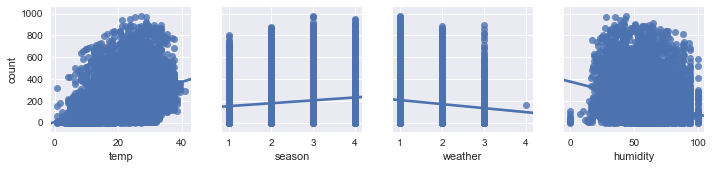

In [15]:
features = ['temp', 'season', 'weather', 'humidity']
linreg = LinearRegression()
linreg.fit(bikes[features], bikes['count'])
linreg.coef_
sns.pairplot(bikes, x_vars=features, y_vars='count', kind='reg')
count_predict = linreg.predict(bikes[features])
np.sqrt(metrics.mean_squared_error(bikes['count'], count_predict))

In [19]:
from sklearn.cross_validation import train_test_split
features = bikes[['temp']]
count = bikes['count']
features_train, features_test, count_train, count_test = train_test_split(features, count)
print("total feature size: {}, train feature size: {}, test feature size: {}".format(len(features), len(features_train), len(features_test)))
linreg = LinearRegression()
linreg.fit(features_train, count_train)
count_predict = linreg.predict(features_test)
np.sqrt(metrics.mean_squared_error(count_test, count_predict))

total feature size: 10886, train feature size: 8164, test feature size: 2722


166.96403661997152

In [33]:
count_avg = bikes['count'].mean()
null_model_count_predict = [count_avg] * len(bikes)
np.sqrt(metrics.mean_squared_error(count, null_model_count_predict))

181.1361335742659

10886